In [2]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


# Lendo os dados

In [3]:
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df.species = df.species.map({'setosa':0, 'virginica':1, 'versicolor':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Analisando os dados do DataSet Iris

In [6]:
df['species'].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='species'>

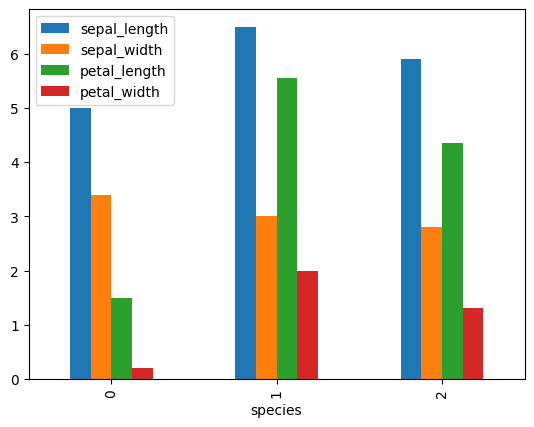

In [7]:
df.groupby('species').median().plot(kind='bar')

In [8]:
headers_list = df.columns.values.tolist()

In [9]:
cm = np.corrcoef(df[headers_list].values.T)

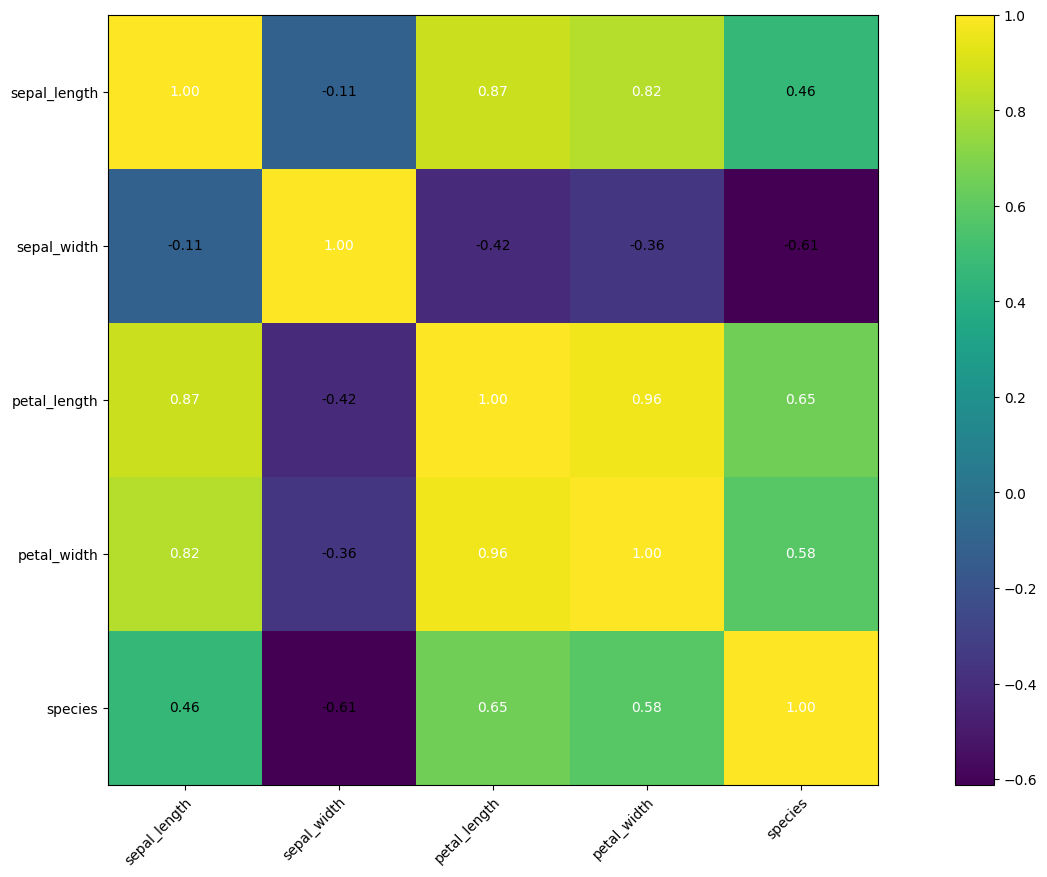

In [10]:
# Checando a coorelação entre as variáveis

hm = heatmap(cm, row_names= headers_list,column_names= headers_list, figsize=[20,10])
plt.show()


### Conclusão
O DataSet oferece uma distribução de flores, suas caracteristicas físicas e sua respectiva especies. Com isso irei utilizar as caracteristicas mais relevantes de cada flor para determinar qual especie ela é. Todas a caracteristas são úteis para poder fazer o modelo, exceto a 'Sepal Width', essa é a única caracteristica que não será relevante para a criação do modelo

## Separando X e y

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [12]:
data = df.to_numpy()
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [13]:
data.shape

(150, 5)

In [14]:
X = data[:,:-1]

y = data[:, -1]


In [15]:
print(X)
X.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

(150, 4)

In [16]:
print(y)
y.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


(150,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [18]:
X_train.shape

(112, 4)

In [19]:
X_test.shape

(38, 4)

# Tratamento de Dados

#### Converter cada array de Numpy em Tensores

In [20]:
X_test_T = torch.tensor(X_test)
X_train_T = torch.tensor(X_train)
y_test_T = torch.tensor(y_test)
y_train_T = torch.tensor(y_train)



In [21]:
X_test_T

tensor([[5.8000, 2.8000, 5.1000, 2.4000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0

In [22]:

class Iris_Dataset(Dataset):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
    
    
# 

## Data Loader

In [23]:
train_dl = DataLoader(Iris_Dataset(X_train_T, y_train_T),  batch_size = len(X_train_T) )
test_dl  = DataLoader(Iris_Dataset(X_test_T, y_test_T),  batch_size = len(X_test_T) )
                             
   

# Criando o Modelo MLP

In [24]:
# Criar uma classe que herda o modulo nn.Module
class MLP_Model(nn.Module):
    
    def __init__(self):
        super(MLP_Model,self).__init__()
        
        # nn.Linear(a,b) --> a entrada, b mapeia ?
        # O primeiro neurônio tem 4 no parênteses pois o data set tem 4 caracteristicas no X,  
        
        self.L1 =  nn.Linear(4,32)
        
        
        
        self.A1 =  nn.ReLU()
        
        # No segundo, receberá o tanto que saiu na layer passada, logo:
        # nn.Linear(c,d) --> c == a, d == quantidasde que sera y previsto, ex: probabilidade de ser cada uma das flores
        
        self.L2 =  nn.Linear(32,16)
        
        self.L3 =  nn.Linear(16,8)
        
        self.L4 =  nn.Linear(8,3) 
        
        # SoftMax é uma função para classificação, ela é similar à função sigmoid
        
        self.A2 = nn.Softmax()
        
    def forward(self, x):
        
        
        
        x = self.L1(x)
        
        
        # Aqui estou transformando o vetor inicial de 4 em um vetor de 5
        
        x = self.A1(x)
       
        
        # Escalando o vetor via função sigmoid, outra possivel é a função reLU --> ler mais sobre
        
        x = self.L2(x)
        
        
        x = self.A1(x)
        
        x = self.L3(x)
        
        x = self.A1(x)
        
        x = self.L4(x)
        
        # Aqui estou transformando o vetor modificado de tamanho 5 em um vetor de 3
        
        x = self.A2(x)
        
        
        
        return x       

# Dados Do Modelo antes do treino

### Dados para o Histograma dos pesos

In [25]:
L1_value_before_train = torch.histogram(MLP_Model().L1.weight.detach())

X_L1_before = L1_value_before_train[1][0:100]
y_L1_before = L1_value_before_train[0]




In [26]:
L2_value_before_train = torch.histogram(MLP_Model().L2.weight.detach())

X_L2_before = L2_value_before_train[1][0:100]
y_L2_before = L2_value_before_train[0]


In [27]:
L3_value_before_train = torch.histogram(MLP_Model().L3.weight.detach())

X_L3_before = L3_value_before_train[1][0:100]
y_L3_before = L3_value_before_train[0]


In [28]:
L4_value_before_train = torch.histogram(MLP_Model().L4.weight.detach())

X_L4_before = L4_value_before_train[1][0:100]
y_L4_before = L4_value_before_train[0]


### Dados Estatisticos dos pesos

#### Layer 1:

In [29]:
weights_L1_before = torch.flatten(MLP_Model().L1.weight.detach())

In [30]:
weights_L2_before = torch.flatten(MLP_Model().L2.weight.detach())

In [31]:
weights_L3_before = torch.flatten(MLP_Model().L3.weight.detach())

In [32]:
weights_L4_before = torch.flatten(MLP_Model().L4.weight.detach())

# Treino


In [33]:

def training( N_Epochs, model, loss_fn, opt  ):
    
    loss_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            print(model.L1)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            loss_list.append(loss.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("cost decay")
    plt.plot(loss_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            




c:\Users\erick\OneDrive\Desktop\Estudos\Python\Pesquisa\.conda\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Linear(in_features=4, out_features=32, bias=True)
0 loss= 1.1009256839752197
Linear(in_features=4, out_features=32, bias=True)
1 loss= 1.10080087184906
Linear(in_features=4, out_features=32, bias=True)
2 loss= 1.1007136106491089
Linear(in_features=4, out_features=32, bias=True)
3 loss= 1.1006265878677368
Linear(in_features=4, out_features=32, bias=True)
4 loss= 1.1005401611328125
Linear(in_features=4, out_features=32, bias=True)
5 loss= 1.100454568862915
Linear(in_features=4, out_features=32, bias=True)
6 loss= 1.1003695726394653
Linear(in_features=4, out_features=32, bias=True)
7 loss= 1.1002848148345947
Linear(in_features=4, out_features=32, bias=True)
8 loss= 1.1002010107040405
Linear(in_features=4, out_features=32, bias=True)
9 loss= 1.1001180410385132
Linear(in_features=4, out_features=32, bias=True)
10 loss= 1.100035309791565
Linear(in_features=4, out_features=32, bias=True)
11 loss= 1.099953293800354
Linear(in_features=4, out_features=32, bias=True)
12 loss= 1.0998722314834595
L

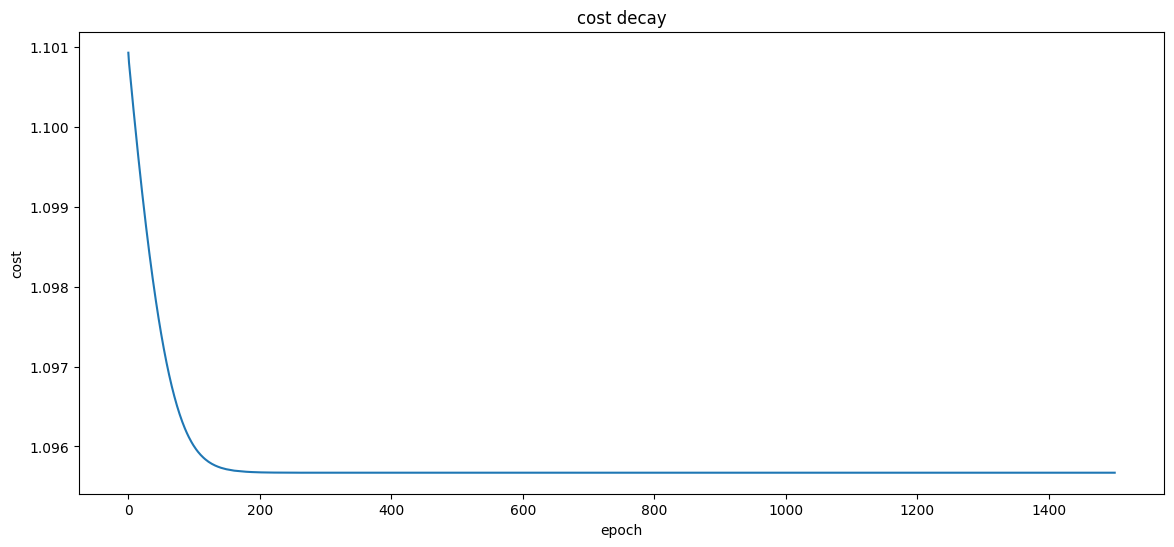

In [34]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

training(  epochs, model , loss_fn, opt  )


# Avaliação do Modelo

In [35]:
with torch.no_grad():
    model.eval()
    
    for xb, yb in test_dl:
        
        
        y_pred = model(xb.float())



    
    yf = torch.argmax(y_pred, dim=1)
    
    print(classification_report(yb, yf))        
        
            
            
    
# Dropoup --> apagar saida de um neuronio
# argmax --> pega o ag

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.24      1.00      0.38         9
         2.0       0.00      0.00      0.00        16

    accuracy                           0.24        38
   macro avg       0.08      0.33      0.13        38
weighted avg       0.06      0.24      0.09        38



c:\Users\erick\OneDrive\Desktop\Estudos\Python\Pesquisa\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\erick\OneDrive\Desktop\Estudos\Python\Pesquisa\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\erick\OneDrive\Desktop\Estudos\Python\Pesquisa\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# Fazendo Histograma dos valores de cada layer

In [36]:
MLP_Model().L1.weight

Parameter containing:
tensor([[-0.2266, -0.1652,  0.2883, -0.3438],
        [-0.4463,  0.2705,  0.4496, -0.3208],
        [-0.3092,  0.0684, -0.3826, -0.2230],
        [ 0.1675, -0.3333, -0.4215,  0.3671],
        [-0.4591,  0.3663,  0.2467,  0.2289],
        [ 0.2286, -0.4542, -0.3334, -0.0033],
        [-0.3023,  0.3630,  0.2551, -0.4252],
        [-0.2666, -0.4300, -0.3947, -0.4820],
        [-0.2097,  0.4947, -0.3184, -0.0067],
        [-0.4474, -0.0309, -0.2966,  0.1503],
        [-0.1483, -0.1365, -0.2986,  0.0450],
        [ 0.3261,  0.3919, -0.0097, -0.4377],
        [ 0.1194,  0.1591, -0.1627,  0.2902],
        [-0.0446, -0.0251,  0.0041,  0.0606],
        [ 0.3442,  0.0120, -0.0930, -0.0446],
        [ 0.2827,  0.2827,  0.4826, -0.3631],
        [ 0.0202,  0.4395, -0.4537,  0.0369],
        [ 0.0449,  0.1610, -0.4975,  0.1236],
        [ 0.0887,  0.4264,  0.1460,  0.4388],
        [-0.2224, -0.0169,  0.1790,  0.4579],
        [ 0.4832, -0.4913, -0.1463, -0.3326],
        [-0.

In [37]:
MLP_Model().L1.weight.shape

torch.Size([32, 4])

In [38]:
MLP_Model().L1.weight[0][0]

tensor(-0.3915, grad_fn=<SelectBackward0>)

In [39]:

# Vou ver somente de um neuronio, o 1o da layer 1

def training_alt( N_Epochs, model, loss_fn, opt  ):
    
    output_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            output = MLP_Model().L1.weight[0][0]
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            output_list.append(output.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("Value")
    plt.plot(output_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            



In [40]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

#training_alt(  epochs, model , loss_fn, opt  )

In [41]:
L1_value_after_train = torch.histogram(MLP_Model().L1.weight.detach())

X_L1_after =L1_value_after_train[1][0:100]
y_L1_after =L1_value_after_train[0]


In [42]:
L2_value_after_train = torch.histogram(MLP_Model().L2.weight.detach())

X_L2_after = L2_value_after_train[1][0:100]
y_L2_after = L2_value_after_train[0]


In [43]:
L4_value_after_train = torch.histogram(MLP_Model().L4.weight.detach())

X_L4_after = L4_value_after_train[1][0:100]
y_L4_after = L4_value_after_train[0]

## Histograms
### Linear 1

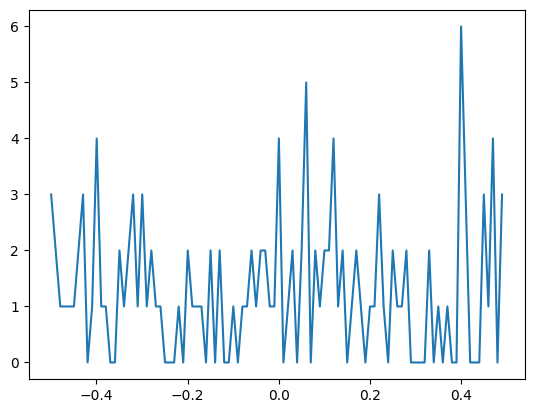

In [44]:
hist_before_train = plt.plot(X_L1_before,y_L1_before)

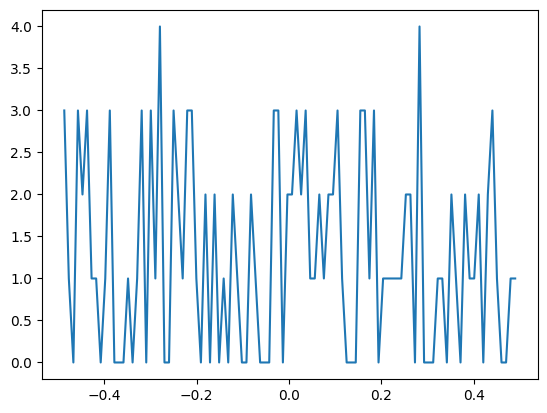

In [45]:
hist_after_train = plt.plot(X_L1_after,y_L1_after)

### Linear 2

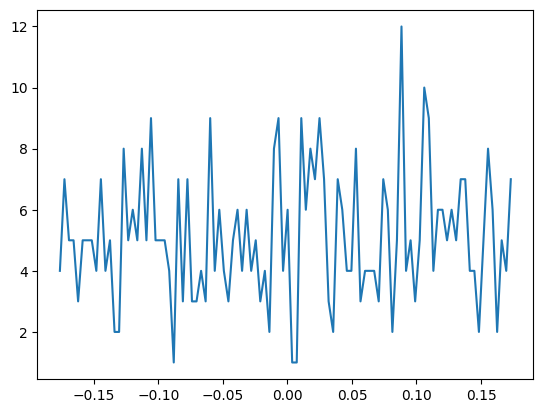

In [46]:
hist_before_train = plt.plot(X_L2_before,y_L2_before)

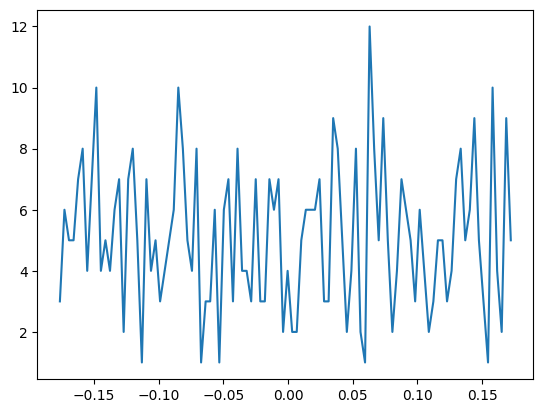

In [47]:
hist_after_train = plt.plot(X_L2_after,y_L2_after)

### Linear 4

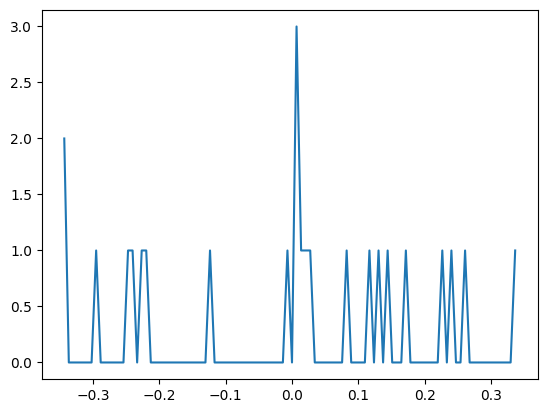

In [48]:
hist_before_train = plt.plot(X_L4_before,y_L4_before)

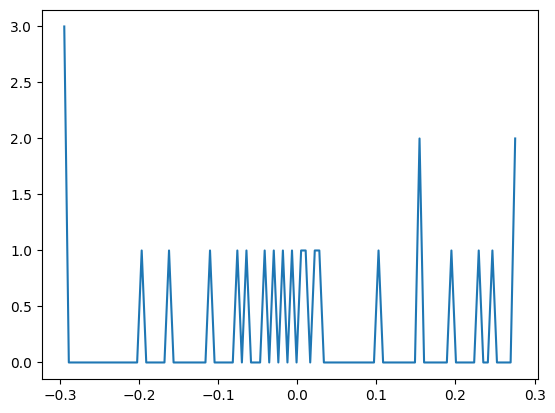

In [49]:
hist_after_train = plt.plot(X_L4_after,y_L4_after)

# Dados Estatisticos de todos os pesos

Será Utilizado o seguinte método para obter dados estatisticos dos pesos:

In [50]:
model.L1.weight.detach()

tensor([[ 0.3251, -0.4934, -0.2326,  0.4359],
        [-0.2600, -0.2753,  0.3230,  0.4333],
        [-0.0469, -0.0426,  0.4485, -0.3904],
        [ 0.2328, -0.3179, -0.4525, -0.2728],
        [ 0.1939, -0.0739, -0.4668, -0.4103],
        [ 0.2553, -0.4809, -0.3421,  0.0913],
        [ 0.3073,  0.3253, -0.4314, -0.3108],
        [-0.3819, -0.1844,  0.2643, -0.1859],
        [ 0.2503,  0.2425, -0.3488,  0.3782],
        [-0.3597, -0.2755,  0.1071,  0.1053],
        [ 0.2247,  0.1922,  0.3403, -0.1634],
        [ 0.1386, -0.4205,  0.3302,  0.3840],
        [-0.3032, -0.3256,  0.3216,  0.4170],
        [ 0.0528,  0.4588,  0.2590,  0.2752],
        [ 0.3497,  0.4051,  0.3815, -0.4551],
        [-0.0191, -0.4452,  0.0301,  0.0549],
        [-0.3063,  0.1572, -0.0607, -0.0648],
        [ 0.2481, -0.0803,  0.0671, -0.4131],
        [-0.4490, -0.1016, -0.2729,  0.1361],
        [ 0.2666, -0.3699, -0.3738,  0.0999],
        [ 0.2551,  0.0782,  0.1930, -0.1888],
        [-0.4482,  0.0776, -0.3926

In [51]:
weights_L1_after = torch.flatten(model.L1.weight.detach())

In [52]:
weights_L2_after = torch.flatten(model.L2.weight.detach())

In [53]:
weights_L3_after = torch.flatten(model.L3.weight.detach())

In [54]:
weights_L3_after = torch.flatten(model.L4.weight.detach())

## Layer 1

In [127]:
mean_b, mean_a = torch.mean(weights_L1_before).item(),torch.mean(weights_L1_after).item()


In [128]:
mode_b ,mode_a = torch.mode(weights_L1_before)[0].item(),torch.mode(weights_L1_after)[0].item()

In [129]:
median_b,median_a = torch.median(weights_L1_before).item(),torch.median(weights_L1_after).item()

In [130]:
max_b, max_a = torch.max(weights_L1_before).item(),torch.max(weights_L1_after).item()

In [131]:
min_b,min_a = torch.min(weights_L1_before).item(),torch.min(weights_L1_after).item()

In [132]:
data = {'Layer 1':["Mean", "Mode", "Median","Max", "Min"],"Before":[mean_b,mode_b,median_b, max_b,min_b ], "After":[mean_a,mode_a,median_a,max_a,min_a]}
df = pd.DataFrame.from_dict(data)
df["Delta"] = df["After"] - df["Before"]
df

,Layer 1,Before,After,Delta
0,Mean,0.004571,0.002496,-0.002075
1,Mode,-0.496804,-0.493381,0.003423
2,Median,0.021816,0.030149,0.008333
3,Max,0.479407,0.497123,0.017716
4,Min,-0.496804,-0.493381,0.003423


## Layer 2

In [133]:
mean_b, mean_a = torch.mean(weights_L2_before).item(),torch.mean(weights_L2_after).item()


In [134]:
mode_b ,mode_a = torch.mode(weights_L2_before)[0].item(),torch.mode(weights_L2_after)[0].item()

In [135]:
median_b,median_a = torch.median(weights_L2_before).item(),torch.median(weights_L2_after).item()

In [136]:
max_b, max_a = torch.max(weights_L2_before).item(),torch.max(weights_L2_after).item()

In [137]:
min_b,min_a = torch.min(weights_L2_before).item(),torch.min(weights_L2_after).item()

In [138]:
data = {'Layer 1':["Mean", "Mode", "Median","Max", "Min"],"Before":[mean_b,mode_b,median_b, max_b,min_b ], "After":[mean_a,mode_a,median_a,max_a,min_a]}
df = pd.DataFrame.from_dict(data)
df["Delta"] = df["After"] - df["Before"]
df

,Layer 1,Before,After,Delta
0,Mean,-0.005212,0.004883,0.010095
1,Mode,-0.176255,-0.176597,-0.000343
2,Median,-0.006168,0.008352,0.014521
3,Max,0.174994,0.176749,0.001755
4,Min,-0.176255,-0.176597,-0.000343
